## 1. MÔI TRƯỜNG

In [1]:
import nltk

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.tree            import DecisionTreeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. BỘ DỮ LIỆU

In [3]:
#Bộ dữ liệu Womens Clothing E-Commerce Reviews
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
##Thông tin chi tiết bộ dữ liệu
print('CHI TIẾT BỘ DATA')
print(df.info(), '\n')
print('>> Số lượng phần tử bộ dữ liệu : ', df.size, '\n')
print('>> Số dòng và cột bộ dữ liệu - (dòng,cột) : ', df.shape)

CHI TIẾT BỘ DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None 

>> Số lượng phần tử bộ dữ liệu :  258346 

>> Số dòng và cột bộ dữ liệu - (dòng,cột) :  (23486, 11)


## 3. TIỀN XỬ LÝ DỮ LIỆU

In [5]:
## Kiểm tra dữ liệu NULL
print('Kiểm tra dữ liệu NULL')
print(df.isnull().sum())

Kiểm tra dữ liệu NULL
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [6]:
# Drop hàng có NULL
df.dropna(inplace=True)

In [7]:
## Kiểm tra lại dữ liệu NULL
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [8]:
## Drop dữ liệu duplicate
df.drop_duplicates()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [9]:
## Numerical features có bao nhiêu giá trị

for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col}", "có", df[col].nunique(), "unique values.")

Unnamed: 0 có 19662 unique values.
Clothing ID có 1095 unique values.
Age có 77 unique values.
Rating có 5 unique values.
Recommended IND có 2 unique values.
Positive Feedback Count có 79 unique values.


In [10]:
## Object features có bao nhiêu giá trị
for col in df.select_dtypes(include="object").columns:
  print(f"{col}", "có", df[col].nunique(), "unique values.")

Title có 13983 unique values.
Review Text có 19656 unique values.
Division Name có 3 unique values.
Department Name có 6 unique values.
Class Name có 20 unique values.


In [11]:
#### Ở đây chúng ta cần Phân tích đánh giá của khách hàng (Review Text) để thu thập phản hồi của khách hàng (Rating) về sản phẩm (tích cực và tiêu cực)
#### Rating chúng ta có giá trị từ 1: worst -> 5: best
#### Ta sẽ gán Rating 1,2,3 là 0 (tiêu cực)
     # Gán Rating 4,5 là 1 (tích cực)
# 1 -> 3: tiêu cực (0)
# 4 -> 5 : tích cực (1)

In [12]:
mapping = {1:0,2:0,3:0,4:1,5:1} 
df['Rating'] = df['Rating'].map(mapping)

### Đối với các phần sau của phân tích, loại bỏ các cột không cần thiết cho NLP.

In [13]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [14]:
df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1, inplace=True)

In [15]:
df.head(5)

,Review Text,Rating
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
5,"I love tracy reese dresses, but this one is no...",0
6,I aded this in my basket at hte last mintue to...,1


In [16]:
df['Review Text'].isnull().value_counts()

False    19662
Name: Review Text, dtype: int64

In [17]:
df['Rating'].isnull().value_counts()

False    19662
Name: Rating, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  19662 non-null  object
 1   Rating       19662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 460.8+ KB


In [19]:
# Đôi khi chúng ta không thể phát hiện các giá trị bị thiếu nếu chúng bao gồm chuỗi trống (trống) chẳng hạn như ' '. Xử lý bằng cách
blanks = [] 

for rv in df.itertuples():
    if type(rv)==str and rv.isspace():
        blanks.append(i)
blanks

[]

In [20]:
df["Review Text"].str.isspace().sum()

0

In [21]:
df[df["Review Text"].str.isspace() == True].index

Int64Index([], dtype='int64')

### TEXT PROCESSING

1. Chuẩn hóa font, loại bỏ các từ vô nghĩa, chuẩn hóa một số từ viết tắt, sai chính tả, tách từ (tokenizer)
2. Đưa tất cả về chữ thường; loại bỏ: số, dấu câu, khoảng trắng thừa, các ký tự lạ

In [22]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [23]:
stop_words = stopwords.words('english')

In [24]:
text = cleaning_fsa(str(df["Review Text"]))
text

'high hope dress reall love love love jumpsuit fun fl shirt flattering due th love tracy reese dress one aded basket hte last mintue happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name review text length dtype object'

In [25]:
df["Review Text"] = df["Review Text"].apply(cleaning_fsa)
df["Review Text"].head()

2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one petite foot tall us...
6    aded basket hte last mintue see would look lik...
Name: Review Text, dtype: object

In [26]:
df.head(3)

,Review Text,Rating
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


In [27]:
# Xử lý các từ hiếm gặp
" ".join(df["Review Text"]).split()

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',


In [28]:
word_values = pd.Series(" ".join(df["Review Text"]).split()).value_counts()
word_values

dress            10048
fit               9068
size              8392
love              7746
top               7342
                 ...  
qualitynot           1
vulnerability        1
purplegray           1
largeblack           1
platinum             1
Length: 15883, dtype: int64

In [29]:
rare_words = word_values[word_values <= 2]
rare_words

reattaching      2
buttonsi         2
predict          2
toosmall         2
jacketthe        2
                ..
qualitynot       1
vulnerability    1
purplegray       1
largeblack       1
platinum         1
Length: 10320, dtype: int64

In [30]:
rare_words.value_counts()

1    8528
2    1792
dtype: int64

In [31]:
len(rare_words)

10320

In [32]:
rare_words.index

Index(['reattaching', 'buttonsi', 'predict', 'toosmall', 'jacketthe',
       'slanted', 'mediterranean', 'reviewersi', 'divinely', 'moon',
       ...
       'longerbroader', 'doest', 'hungyuck', 'largenot', 'bedskirt',
       'qualitynot', 'vulnerability', 'purplegray', 'largeblack', 'platinum'],
      dtype='object', length=10320)

In [33]:
df["Review Text"] = df["Review Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["Review Text"].head()

2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one petite foot tall us...
6    basket hte last see would look like person sto...
Name: Review Text, dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  19662 non-null  object
 1   Rating       19662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 460.8+ KB


In [35]:
df.head()

,Review Text,Rating
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
5,love tracy reese dress one petite foot tall us...,0
6,basket hte last see would look like person sto...,1


## Data Visualization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
def top_n_words(x, n):
    vectorizer = CountVectorizer().fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [38]:
top_unigrams = top_n_words(df["Review Text"], 20)
df_unigrams = pd.DataFrame(top_unigrams)
top_unigrams

[('dress', 10048),
 ('fit', 9068),
 ('size', 8392),
 ('love', 7746),
 ('top', 7342),
 ('like', 6268),
 ('color', 6153),
 ('look', 6137),
 ('wear', 5782),
 ('im', 5332),
 ('great', 5272),
 ('would', 4469),
 ('fabric', 4357),
 ('small', 4039),
 ('really', 3509),
 ('ordered', 3427),
 ('little', 3340),
 ('one', 3331),
 ('perfect', 3303),
 ('flattering', 3075)]

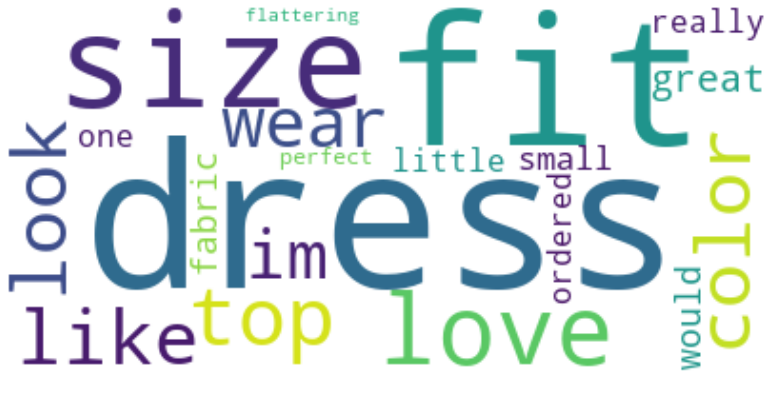

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(df_unigrams.set_index(0)[1])
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

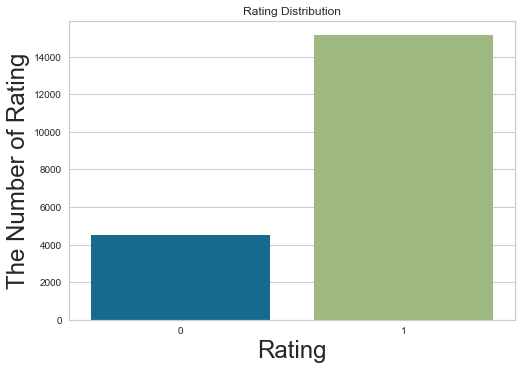

In [40]:
sns.countplot(df['Rating'])
plt.title('Rating Distribution')
plt.xlabel('Rating', fontsize = 24)
plt.ylabel('The Number of Rating', fontsize = 24)
plt.show()

## 4. TRAIN | TEST & SPLIT

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df["Review Text"]
y= df["Rating"]

In [43]:
# Bắt đầu lấy mẫu phân tầng
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## 5. TEXT VECTORIZATION

Nghiên cứu này lựa chọn từ khóa theo phương pháp TF-IDF (Term Frequency/Inverse Document Frequency), giá trị TF-IDF của một từ khóa là một con số thu được qua thống kê thể hiện mức độ quan trọng của từ khóa này trong một
bình luận.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [46]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. MACHINE LEARNING

In [48]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [61]:
def eval(model, X_test):
    y_pred = model.predict(X_test)

    conmat = confusion_matrix(y_test, y_pred)
    val = np.mat(conmat) 
    classnames = list(set(y_train))
    df_cm = pd.DataFrame( val, index=classnames, columns=classnames, )
    print(df_cm)

    print("\n report")
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(model, X_test, y_test, ax=ax)


## DECISION TREE

In [59]:
from sklearn.tree import DecisionTreeClassifier

model_dec = DecisionTreeClassifier(max_depth=10, random_state=42,criterion= 'entropy')
dTree = model_dec.fit(X_train_tf_idf, y_train)
y_pred_dTree= dTree.predict(X_test_tf_idf)

Decision Tree MODEL
     0     1
0  231   672
1  136  2894

 report
              precision    recall  f1-score   support

           0       0.63      0.26      0.36       903
           1       0.81      0.96      0.88      3030

    accuracy                           0.79      3933
   macro avg       0.72      0.61      0.62      3933
weighted avg       0.77      0.79      0.76      3933



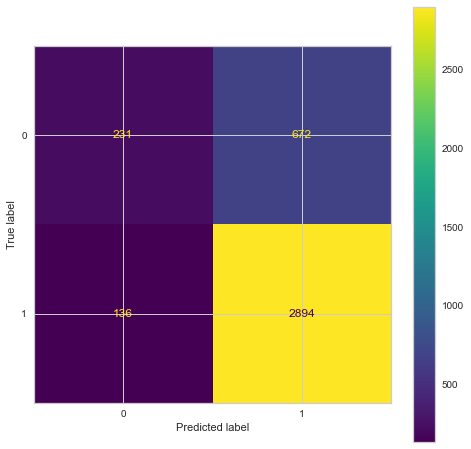

In [62]:
print("Decision Tree MODEL")

eval(model_dec, X_test_tf_idf)

In [63]:
import pydotplus         as pdp
from IPython.display         import Image
from sklearn                 import tree

In [64]:
text_format = tree.export_text(model_dec)
print(text_format)

|--- feature_3359 <= 0.09
|   |--- feature_932 <= 0.08
|   |   |--- feature_2751 <= 0.06
|   |   |   |--- feature_2085 <= 0.06
|   |   |   |   |--- feature_1336 <= 0.12
|   |   |   |   |   |--- feature_773 <= 0.13
|   |   |   |   |   |   |--- feature_5131 <= 0.13
|   |   |   |   |   |   |   |--- feature_2724 <= 0.09
|   |   |   |   |   |   |   |   |--- feature_963 <= 0.05
|   |   |   |   |   |   |   |   |   |--- feature_3361 <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_3361 >  0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_963 >  0.05
|   |   |   |   |   |   |   |   |   |--- feature_3869 <= 0.15
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_3869 >  0.15
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2724 >  0.09
|   |   |   |   |   |   |   |   |--- feature_313 <

In [65]:
accuracy_dTree = accuracy_score(y_test, y_pred_dTree)
precision_dTree = precision_score(y_test, y_pred_dTree)
f1_dTree = f1_score(y_test, y_pred_dTree)

## ADABOOST

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)

dADA = ada.fit(X_train_tf_idf, y_train)

y_pred_dADA= dADA.predict(X_test_tf_idf)

Ada MODEL
     0     1
0  559   344
1  225  2805

 report
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       903
           1       0.89      0.93      0.91      3030

    accuracy                           0.86      3933
   macro avg       0.80      0.77      0.79      3933
weighted avg       0.85      0.86      0.85      3933



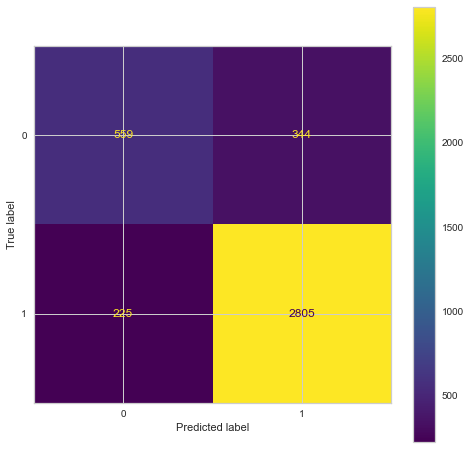

In [67]:
print("Ada MODEL")

eval(ada, X_test_tf_idf)

In [68]:
accuracy_dADA = accuracy_score(y_test, y_pred_dADA)
precision_dADA = precision_score(y_test, y_pred_dADA)
f1_dADA = f1_score(y_test, y_pred_dADA)

### TABLE để dễ quan sát các chỉ số của Decision Tree và AdaBoost

In [69]:
from tabulate import tabulate

# Create a header of the table data
table_heading = ["Score", "Decision Tree", "AdaBoost"]

# a list of list containing inner list as rows of table
table_data = [["Accuracy", accuracy_dTree, accuracy_dADA], ["Precision", precision_dTree, precision_dADA], ["f1_score", f1_dTree, f1_dADA]]

# print data in tabular format in terminal
print(tabulate(table_data, headers=table_heading, tablefmt="fancy_grid"))

╒═══════════╤═════════════════╤════════════╕
│ Score     │   Decision Tree │   AdaBoost │
╞═══════════╪═════════════════╪════════════╡
│ Accuracy  │        0.794559 │   0.855327 │
├───────────┼─────────────────┼────────────┤
│ Precision │        0.811554 │   0.890759 │
├───────────┼─────────────────┼────────────┤
│ f1_score  │        0.877502 │   0.907914 │
╘═══════════╧═════════════════╧════════════╛
